In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

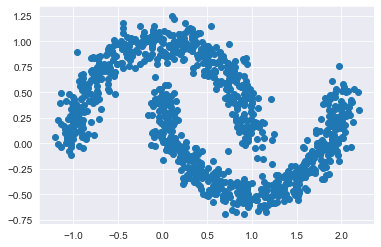

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])

In [3]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [4]:
min_pts = int(len(X)/200)

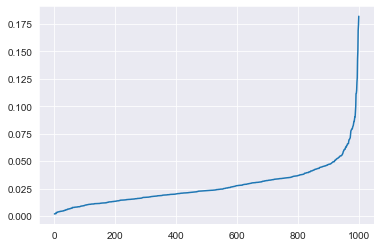

In [5]:
neigh = NearestNeighbors(n_neighbors=min_pts)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [6]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

972
0.07413816461754977
***


In [7]:
m = KMeans(n_clusters=2)
m.fit(X)

KMeans(n_clusters=2)

In [8]:
clusters = m.labels_
clusters

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

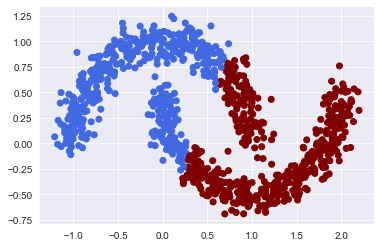

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [10]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value

,0,1,cluster
0,0.725351,0.562673,1
1,0.870944,-0.423798,1
2,0.027516,0.568537,0
3,1.257023,-0.587889,1
4,1.928836,0.215432,1
...,...,...,...
995,-0.545640,0.678993,0
996,-0.116684,0.975651,0
997,0.247339,0.960626,0
998,0.871860,0.397367,1


In [11]:
def calculate_member_core_point(cluster_values, cluster_number):
    core_point_arrays = cluster_values.groupby('cluster').get_group(cluster_number).drop('cluster', axis=1).to_numpy()
    core_points = dict()
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        core_points[point] = pi
    return core_points

# dens_value = dict(sorted(calculate_member_core_point(cluster_value, 0).items(), reverse=True))
# dens_value

In [12]:
def find_center_point(point1, point2):
    n = len(point1)
    result = [0 for i in range(n)]
    for i in range(n):
        result[i] = (point1[i] + point2[i]) / 2
    return [result[i] for i, v in enumerate(result)]

In [13]:
find_center_point([5, 3, 4], [2, 7, 6])

[3.5, 5.0, 5.0]

In [14]:
def compress_data(dens_values):
    final_point = []
    not_check = []
    iterate = 0
    middlePoint = []
    for kpi, pi in dens_values.items():
        middlePoint = pi
        dens = 0
        continues = 0
        for key, check in enumerate(not_check):
            if (pi == check).all():
                continues = 1
                break
        if continues == 1:
            continue
        for kpj, pj in dens_values.items():
            if (dist(middlePoint, pj) < eps and dist(middlePoint, pj) != 0):
                middlePoint = find_center_point(middlePoint, pj)
                not_check.append(pj)
                dens += 1
        print(dens)
        middlePoint = np.append(middlePoint, dens)
        final_point.append(np.ndarray.tolist(np.array(middlePoint)))
    return final_point

In [15]:
all_data = []
for i in range(m.labels_.max() + 1):
    dens_value = dict(sorted(calculate_member_core_point(cluster_value, i).items(), reverse=True))
    all_data.append(compress_data(dens_value))

result = []
for i, vi in enumerate(all_data):
    for j, vj in enumerate(vi):
        result.append(vj)



3
4
0
0
0
0
0
0
4
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
1
0
0
0


In [16]:
arrays_dens = np.array(result)
arrays_dens

array([[-1.13494745e-01,  1.01166422e+00,  3.00000000e+00],
       [-9.95445424e-02,  1.00800777e+00,  4.00000000e+00],
       [ 1.28723968e-01,  9.42255569e-01,  0.00000000e+00],
       [-6.76785893e-01,  7.03997577e-01,  0.00000000e+00],
       [ 5.03169117e-01,  9.01693971e-01,  0.00000000e+00],
       [ 5.65377261e-01,  6.53455914e-01,  0.00000000e+00],
       [ 2.47338977e-01,  9.60625881e-01,  0.00000000e+00],
       [-2.42454669e-02,  6.36947060e-02,  0.00000000e+00],
       [-1.10751760e-01,  1.08316568e+00,  4.00000000e+00],
       [-5.45640076e-01,  6.78992644e-01,  0.00000000e+00],
       [-8.70221177e-01,  5.53336972e-02,  0.00000000e+00],
       [-6.16954019e-01,  5.85400844e-01,  0.00000000e+00],
       [ 1.21575685e-01,  8.24318710e-01,  0.00000000e+00],
       [ 1.00387057e-01,  1.24423813e+00,  0.00000000e+00],
       [ 3.06652727e-03, -1.66693750e-01,  0.00000000e+00],
       [ 7.46871093e-01,  6.96091102e-01,  3.00000000e+00],
       [ 1.83865824e+00, -4.01201907e-02

In [17]:
new_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] >= 3)]
new_dens

array([[-0.11349474,  1.01166422,  3.        ],
       [-0.09954454,  1.00800777,  4.        ],
       [-0.11075176,  1.08316568,  4.        ],
       [ 0.74687109,  0.6960911 ,  3.        ]])

In [18]:
zero_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] < 3)]

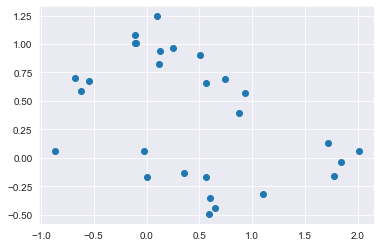

In [19]:
plt.scatter(arrays_dens[:, 0], arrays_dens[:, 1])

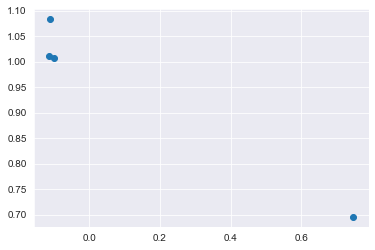

In [20]:
plt.scatter(new_dens[:, 0], new_dens[:, 1])

In [21]:
zero_dens_point = zero_dens[:, 0:len(zero_dens[0, :]) - 1]

In [22]:
delete_values = []
for key, value in enumerate(X):
    for zkey, zval in enumerate(zero_dens_point):
        if dist(zval, value) < eps:
            delete_values.append(value)

remain_values = []
for key, value in enumerate(X):
    length = 0
    for dkey, dval in enumerate(delete_values):
        if (dval != value).all():
            length += 1
    if length == len(delete_values):
        remain_values.append(value)
remain_values = np.array(remain_values)
remain_values

array([[ 0.72535107,  0.5626732 ],
       [ 0.87094356, -0.42379765],
       [ 0.02751583,  0.56853657],
       ...,
       [ 0.77903103,  0.66205573],
       [-0.11668406,  0.97565124],
       [ 0.73307825,  0.72204546]])

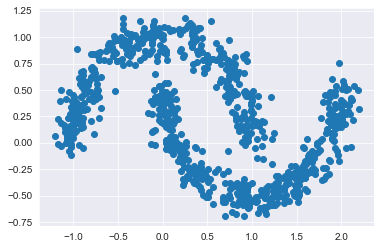

In [23]:
plt.scatter(remain_values[:, 0], remain_values[:, 1])

In [24]:
m = DBSCAN(eps=eps, min_samples=min_pts)
m.fit(remain_values)

DBSCAN(eps=0.07413816461754977)

In [25]:
final_db_cluster = m.labels_
final_db_cluster

array([ 0,  1,  4,  1,  2,  3,  4,  4,  1,  1,  5,  6,  6,  5,  5,  1,  7,
       -1,  4,  4, -1,  2,  2,  0,  6,  1,  6,  1,  1,  5,  4, -1,  1,  3,
        6,  6,  3,  1,  5,  1,  0,  4,  5,  1,  2,  0,  2,  2,  1,  4,  0,
        2,  4,  0,  4,  2,  3,  6,  2,  0,  3,  4,  2,  3,  0,  6,  0,  4,
        4,  1,  4, -1,  2, -1,  6, -1,  4,  4,  5,  1,  2,  3,  4,  3,  4,
        3,  1,  5,  4,  1,  6,  1,  6, -1,  6,  3,  1,  4,  6,  3,  0,  1,
        1, -1,  6,  4, -1,  0, -1,  6,  0,  3,  0,  6,  4,  4,  1,  1,  3,
       -1,  4,  6,  5,  6,  2,  1,  2, -1,  0, -1,  3,  2,  4,  3,  6,  7,
        3,  1,  2,  4,  4,  4,  6,  1,  3,  1,  1,  0,  6, -1, -1,  3,  3,
        6,  3, -1,  6,  4,  1,  4,  3,  4,  6,  1, -1,  3,  1,  3,  5,  1,
        0,  4,  4,  6,  0,  0,  5, -1, -1,  3,  5,  6,  3, -1,  4,  0, -1,
        6,  6, -1,  1,  2,  0,  4, -1,  4,  4, -1,  4,  4,  4,  2,  3,  1,
        5,  4,  6, -1,  1, -1,  4,  4,  2,  0,  1,  3, -1,  5,  2,  3,  6,
        6,  6,  5, -1,  0

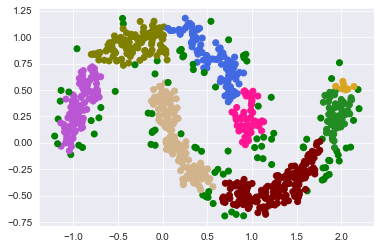

In [26]:
plt.scatter(remain_values[:, 0], remain_values[:, 1], c=vectorizer(final_db_cluster))

In [27]:
dens_cluster_value = pd.concat([pd.DataFrame(remain_values), pd.DataFrame(final_db_cluster, columns=['cluster'])],
                               axis=1)
dens_cluster_value

,0,1,cluster
0,0.725351,0.562673,0
1,0.870944,-0.423798,1
2,0.027516,0.568537,4
3,1.257023,-0.587889,1
4,1.928836,0.215432,2
...,...,...,...
829,1.996056,0.150370,2
830,0.271286,-0.312128,4
831,0.779031,0.662056,0
832,-0.116684,0.975651,6


In [28]:
def find_center_point_cluster(cluster_values, cluster_number):
    center_points = []
    for i in range(cluster_number):
        mid_point = []
        denses = cluster_values.groupby('cluster').get_group(i).drop('cluster', axis=1).to_numpy()
        for key, value in enumerate(denses):
            if key == 0:
                mid_point = value
            if (key != len(denses)):
                mid_point = find_center_point(mid_point, value)
        center_points.append(mid_point)
    return center_points

center_point =find_center_point_cluster(dens_cluster_value, max(final_db_cluster) + 1)

In [29]:
center_point = np.array(center_point)
center_point

array([[ 0.71799428,  0.72382758],
       [ 0.91394669, -0.48052332],
       [ 1.95834989,  0.17249767],
       [-0.80155739,  0.59345923],
       [ 0.24127501, -0.11506372],
       [ 0.93813978,  0.09602505],
       [-0.20144402,  1.00556056],
       [ 2.02069613,  0.5236706 ]])

In [30]:
kmeans = KMeans(n_clusters=len(center_point), init=center_point, n_init=1)
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([5, 1, 4, 2, 7, 3, 4, 4, 2, 1, 7, 5, 6, 6, 5, 5, 5, 3, 3, 1, 7, 1,
       4, 4, 1, 7, 7, 5, 0, 6, 2, 7, 6, 1, 2, 5, 4, 4, 0, 7, 2, 5, 3, 6,
       6, 3, 7, 2, 5, 1, 0, 4, 5, 2, 7, 5, 1, 7, 0, 7, 2, 4, 5, 7, 4, 0,
       3, 1, 7, 3, 3, 6, 7, 5, 3, 4, 0, 7, 3, 0, 6, 0, 4, 4, 2, 1, 0, 7,
       3, 2, 6, 7, 1, 5, 1, 1, 5, 2, 7, 3, 4, 3, 4, 3, 2, 5, 7, 4, 7, 7,
       3, 7, 6, 5, 6, 3, 2, 4, 6, 3, 0, 7, 2, 5, 7, 5, 6, 4, 4, 7, 0, 4,
       7, 7, 6, 0, 3, 0, 6, 1, 4, 2, 2, 3, 2, 4, 3, 5, 6, 7, 2, 7, 7, 0,
       1, 3, 7, 4, 3, 0, 6, 6, 7, 3, 1, 1, 7, 4, 4, 7, 1, 6, 3, 2, 3, 2,
       1, 0, 6, 0, 3, 3, 3, 6, 3, 3, 6, 4, 2, 1, 3, 4, 6, 1, 7, 3, 7, 3,
       5, 2, 0, 4, 4, 6, 0, 0, 0, 5, 7, 7, 3, 0, 5, 6, 3, 7, 4, 0, 3, 6,
       6, 7, 1, 7, 0, 1, 7, 4, 4, 1, 1, 4, 4, 7, 7, 3, 3, 2, 5, 4, 7, 6,
       7, 2, 7, 4, 4, 7, 0, 0, 2, 3, 5, 5, 1, 7, 3, 0, 6, 6, 6, 6, 6, 5,
       1, 5, 0, 2, 3, 7, 6, 3, 2, 0, 3, 2, 0, 6, 2, 5, 5, 1, 0, 6, 3, 7,
       3, 3, 0, 1, 6, 3, 5, 1, 4, 2, 4, 5, 1, 7, 3,

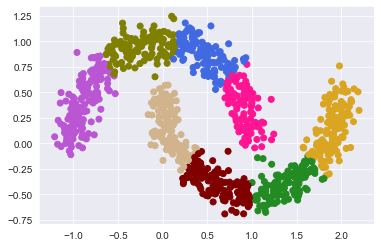

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))